In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import array_to_latex

In [4]:
# IBMQ.save_account('7118494f0cdf73e3e9c054d75519e1934f56f59ae3b6112a8c56d2a73d3d3c38c7d742b946284e532cc729c3d225cf38773ed9cab49c0f67ca5aa44ff5bf648f')
provider = IBMQ.load_account()

In [5]:
backend = provider.get_backend('ibmq_lima')

In [24]:
qc=QuantumCircuit(4,2)
qc.h(0)
qc.x(1)
qc.cx(1,0)
qc.h(2)
qc.x(3)
qc.cx(3,2)

# qc.measure_all()
# qc.x(0)
qc.draw('mpl', scale=3)
job_exp = execute(qc, backend, shots=1024)
result = job_exp.result()

In [25]:
print(result.time_taken)
# print(result.data())

3.5555033683776855


In [26]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

t = 2  # This is not optimal; As an exercise, set this to the
       # value that will get the best results. See section 8 for solution.

nqubits = 4  # Total number of qubits
nb = 1  # Number of qubits representing the solution
nl = 2  # Number of qubits representing the eigenvalues

theta = 0  # Angle defining |b>

a = 1  # Matrix diagonal
b = -1/3  # Matrix off-diagonal

# Initialize the quantum and classical registers
qr = QuantumRegister(nqubits)

# Create a Quantum Circuit
qc = QuantumCircuit(qr)

qrb = qr[0:nb]
qrl = qr[nb:nb+nl]
qra = qr[nb+nl:nb+nl+1]

# State preparation. 
qc.ry(2*theta, qrb[0])
    
# QPE with e^{iAt}
for qu in qrl:
    qc.h(qu)

qc.p(a*t, qrl[0])
qc.p(a*t*2, qrl[1])

qc.u(b*t, -np.pi/2, np.pi/2, qrb[0])


# Controlled e^{iAt} on \lambda_{1}:
params=b*t

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Controlled e^{2iAt} on \lambda_{2}:
params = b*t*2

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Inverse QFT
qc.h(qrl[1])
qc.rz(-np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(-np.pi/4,qrl[0])
qc.h(qrl[0])

# Eigenvalue rotation
t1=(-np.pi +np.pi/3 - 2*np.arcsin(1/3))/4
t2=(-np.pi -np.pi/3 + 2*np.arcsin(1/3))/4
t3=(np.pi -np.pi/3 - 2*np.arcsin(1/3))/4
t4=(np.pi +np.pi/3 + 2*np.arcsin(1/3))/4

qc.cx(qrl[1],qra[0])
qc.ry(t1,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t2,qra[0])
qc.cx(qrl[1],qra[0])
qc.ry(t3,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t4,qra[0])
qc.measure_all()

print("Depth: %i" % qc.depth())
print("CNOTS: %i" % qc.count_ops()['cx'])
qc.draw(fold=-1)


Depth: 26
CNOTS: 10


┌───────┐┌──────────────────────┐┌────────┐┌───┐┌──────────────┐┌───┐┌─────────────┐┌─────────┐┌────────┐┌───┐┌─────────────┐┌───┐┌────────────┐┌─────────┐                                                                                                               ░ ┌─┐         
 q36_0: ┤ Ry(0) ├┤ U(-0.66667,-π/2,π/2) ├┤ P(π/2) ├┤ X ├┤ Ry(-0.66667) ├┤ X ├┤ Ry(0.66667) ├┤ P(3π/2) ├┤ P(π/2) ├┤ X ├┤ Ry(-1.3333) ├┤ X ├┤ Ry(1.3333) ├┤ P(3π/2) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────░─┤M├─────────
        └─┬───┬─┘└───────┬──────┬───────┘└────────┘└─┬─┘└──────────────┘└─┬─┘└─────────────┘└─────────┘└────────┘└─┬─┘└─────────────┘└─┬─┘└────────────┘└─────────┘                      ┌──────────┐     ┌───┐                                                                   ░ └╥┘┌─┐      
 q36_1: ──┤ H ├──────────┤ P(2) ├────────────────────■────────────────────■────────────────────────────────────────┼───────────────────┼──────────────────────────────■───────────────■──┤ Rz(-π/4) ├─────┤ H ├────────■────────────────────────────────────────■─────────────────░──╫─┤M├──────
          ├───┤          ├──────┤                                                                                  │                   │      ┌───┐     ┌──────────┐┌─┴─┐┌─────────┐┌─┴─┐└──────────┘     └───┘        │                                        │                 ░  ║ └╥┘┌─┐   
 q36_2: ──┤ H ├──────────┤ P(4) ├──────────────────────────────────────────────────────────────────────────────────■───────────────────■──────┤ H ├─────┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├─────■────────────────────────┼────────────────────■───────────────────┼─────────────────░──╫──╫─┤M├───
          └───┘          └──────┘                                                                                                             └───┘     └──────────┘└───┘└─────────┘└───┘   ┌─┴─┐    ┌──────────────┐┌─┴─┐┌──────────────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐ ░  ║  ║ └╥┘┌─┐
 q36_3: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤ X ├────┤ Ry(-0.69352) ├┤ X ├┤ Ry(-0.87728) ├┤ X ├┤ Ry(0.35368) ├┤ X ├┤ Ry(1.2171) ├─░──╫──╫──╫─┤M├
                                                                                                                                                                                            └───┘    └──────────────┘└───┘└──────────────┘└───┘└─────────────┘└───┘└────────────┘ ░  ║  ║  ║ └╥┘
meas: 4/═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                                                                                                                                                                                                                                     0  1  2  3

In [27]:
job_exp = execute(qc, backend, shots=1024)
result = job_exp.result()

In [28]:
print(result.time_taken)

4.201303958892822


In [6]:
job = execute(qc, backend, shots=8192)
job_monitor(job, interval=2)
counts = job.result().get_counts()

NameError: name 'qc' is not defined

{'00': 3936, '01': 208, '10': 157, '11': 3891}


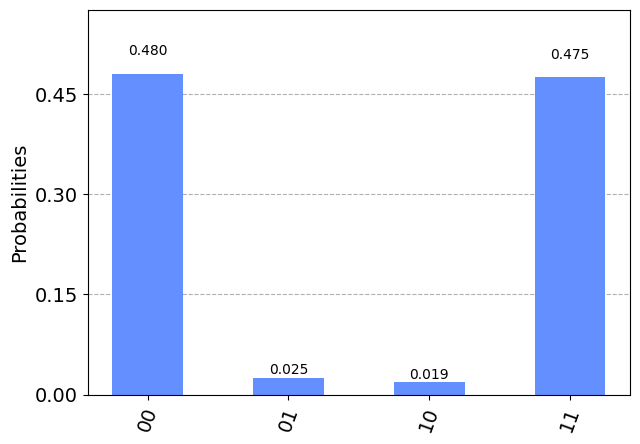

In [12]:
import matplotlib.pyplot as plt
print(counts)
plt.style.use('default')
plot_histogram(counts)


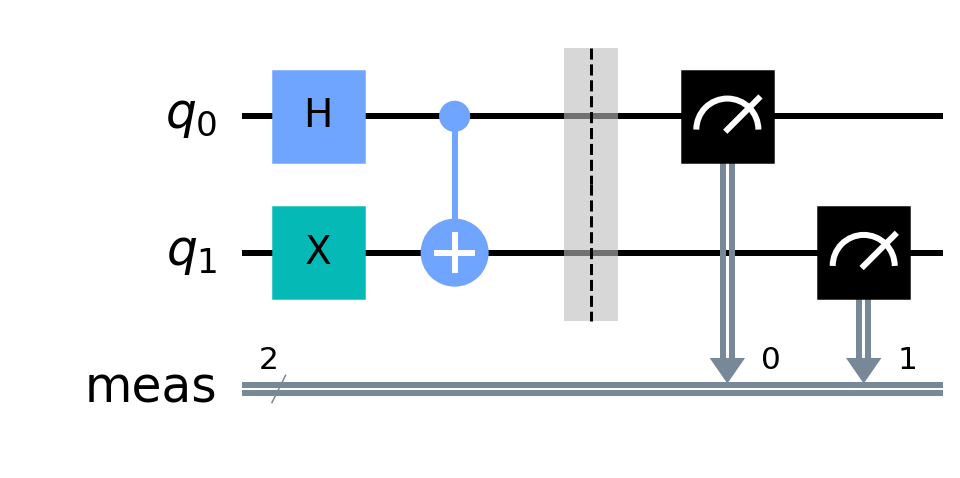

In [6]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
# qc.x(0)
qc.draw('mpl', scale=3)


Job Status: job has successfully run
{'00': 538, '01': 3820, '10': 3668, '11': 166}


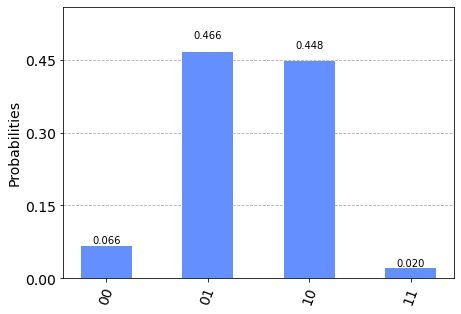

In [7]:
job = execute(qc, backend, shots=8192)
job_monitor(job, interval=2)
result = job.result().get_counts()

print(result)
plot_histogram(result)

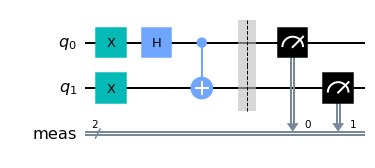

In [8]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
# qc.z(0)
# qc.x(0)
qc.draw('mpl')


Job Status: job has successfully run
{'00': 488, '01': 3747, '10': 3809, '11': 148}


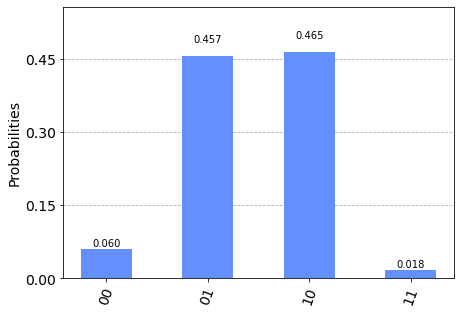

In [9]:
job = execute(qc, backend, shots=8192)
job_monitor(job, interval=2)
result = job.result().get_counts()

print(result)
plot_histogram(result)

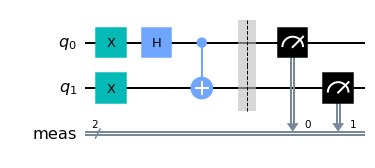

In [10]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
# qc.z(0)
# qc.x(0)
qc.draw('mpl')

Job Status: job has successfully run
{'00': 492, '01': 3779, '10': 3803, '11': 118}


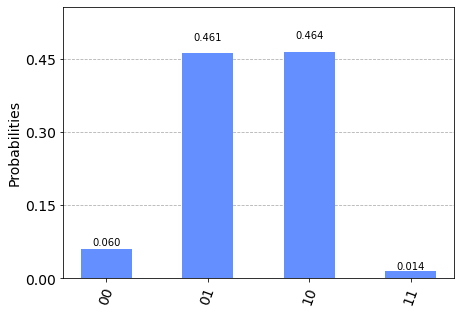

In [11]:
job = execute(qc, backend, shots=8192)
job_monitor(job, interval=2)
result = job.result().get_counts()

print(result)
plot_histogram(result)